### Dealing with Imbalanced Classes
<hr>
#### Agenda
* What are imbalanced classes & their impact ?
* OverSampling
* UnderSampling
* Connecting Sampler to pipelines
* Making classification algorithm aware of Imbalance
* Anomaly Detection

<hr>



### 1. Imbalanced Classes & Impact
* Data with skewed class distribution.
* Common examples are spam/ham mails, malicious/normal packets.
* Classification algorithms are prone to predict data with heavier class.
* accuracy_score is not the right matrix.
* We got to rely on matrices like confusion_matrix, recall, precision 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.metrics import confusion_matrix
from collections import Counter

In [2]:
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

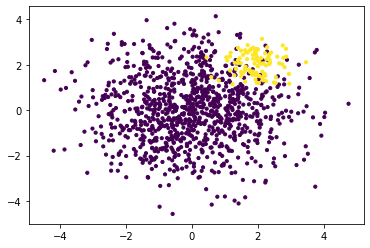

In [3]:
plt.scatter(X[:,0], X[:,1],s=10,c=y)

In [4]:
from sklearn.svm import SVC

In [5]:
svc = SVC(kernel='linear')

In [6]:
svc.fit(X,y)

SVC(kernel='linear')

In [7]:
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [8]:
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

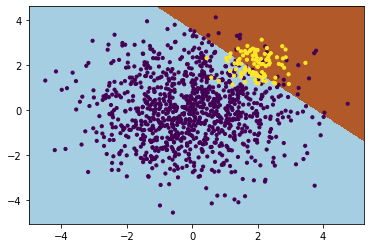

In [9]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=y,s=10)

* As we can see, decision boundry is impacted
* imbalanced package provides many such sampling techniques - `pip install imbalanced`

### 2. OverSampling
* One way to fight this issue is to generate new samples in the classes which are under-represented. 
* The most naive strategy is to generate new samples by randomly sampling with replacement the current available samples.
* RandomOverSampler is simpliest api to provide such functionality

#### RandomOverSampler

In [10]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                            n_redundant=0, n_repeated=0, n_classes=3,
                            n_clusters_per_class=1,
                            weights=[0.01, 0.05, 0.94],
                            class_sep=0.8, random_state=0)

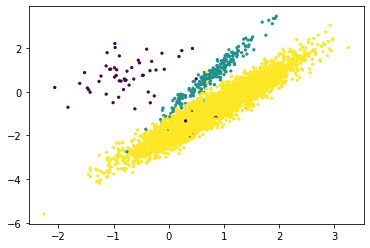

In [11]:
plt.scatter(X[:,0], X[:,1],s=5,c=y)

In [12]:
svc.fit(X,y)

SVC(kernel='linear')

In [13]:
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [14]:
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

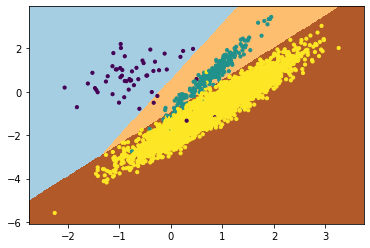

In [15]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=y,s=10)

In [16]:
!pip install -U imbalanced-learn

In [17]:
!pip install delayed

In [18]:
!pip install scikit-learn

In [19]:
from imblearn.over_sampling import RandomOverSampler

In [20]:
ros = RandomOverSampler(random_state=0)

In [22]:
X_resampled, y_resampled = ros.fit_resample(X,y)

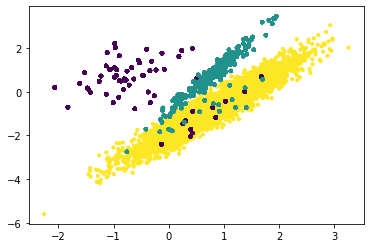

In [23]:
plt.scatter(X_resampled[:,0],X_resampled[:,1],c=y_resampled,s=10)

In [24]:
svc.fit(X_resampled,y_resampled)

SVC(kernel='linear')

In [25]:
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

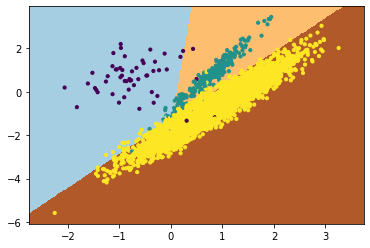

In [26]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=y,s=10)

In [27]:
pred = svc.predict(X)
confusion_matrix(y_pred=pred, y_true=y)

array([[  49,    3,   12],
       [   9,  237,   16],
       [  38,   53, 4583]], dtype=int64)

#### SMOTE (Synthetic Minority Oversampling Technique)
* Generates new samples by interpolation
* It doesn't duplicates data

In [28]:
from imblearn.over_sampling import SMOTE

In [30]:
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

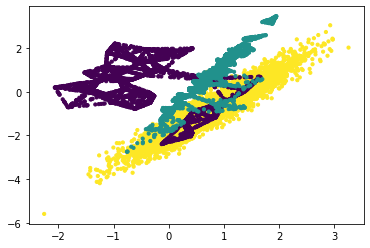

In [31]:
plt.scatter(X_resampled[:,0],X_resampled[:,1],c=y_resampled,s=10)

In [32]:
svc.fit(X_resampled,y_resampled)

SVC(kernel='linear')

In [ ]:
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

In [ ]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=y,s=10)

In [ ]:
pred = svc.predict(X)
confusion_matrix(y_pred=pred, y_true=y)

#### ADASYN (Adaptive Synthetic Sampling Method)
* Similar to SMOTE, this also generates data.
* Generate samples to the original which are wrongly mis-classified
* SMOTE doen't consider this situation

In [ ]:
from imblearn.over_sampling import ADASYN

In [ ]:
X_resampled, y_resampled = ADASYN().fit_resample(X, y)

In [ ]:
plt.scatter(X_resampled[:,0],X_resampled[:,1],c=y_resampled,s=10)

In [ ]:
svc.fit(X_resampled,y_resampled)

In [ ]:
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

In [ ]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=y,s=10)

In [ ]:
pred = svc.predict(X)
confusion_matrix(y_pred=pred, y_true=y)

### 3. Undersampling
* Reducing the data of the over-represented class

#### RandomUnderSampler
* The reduced data is picked randomly from the sample & not derived

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus = RandomUnderSampler(random_state=0)

In [ ]:
X_resampled, y_resampled = rus.fit_resample(X, y)

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y,s=10)

In [ ]:
plt.scatter(X_resampled[:,0],X_resampled[:,1],c=y_resampled,s=10)

In [ ]:
print(sorted(Counter(y).items()))

In [ ]:
print(sorted(Counter(y_resampled).items()))

#### ClusterCentroid for data generation
* Generating representative data using kmeans
* Centroids of clusters are used

In [ ]:
from imblearn.under_sampling import ClusterCentroids

In [ ]:
cc = ClusterCentroids(random_state=0)

In [ ]:
X_resampled, y_resampled = cc.fit_sample(X, y)

In [ ]:
plt.scatter(X_resampled[:,0],X_resampled[:,1],c=y_resampled,s=10)

### 4. Connecting Sampler to Pipelines
* We can any of these sampler to be part of pipeline so that we can validate them
* scikit pipeline is not capable of dealing with samplers & we have to use overridden pipeline by imblearn

In [ ]:
from imblearn.pipeline import make_pipeline

In [ ]:
pipeline1 = make_pipeline(RandomOverSampler(),SVC(kernel='linear'))

In [ ]:
pipeline2 = make_pipeline(RandomUnderSampler(),SVC(kernel='linear'))

In [ ]:
pipelines = [pipeline1,pipeline2]

In [ ]:
for pipeline in pipelines:
    pipeline.fit(X,y)

In [ ]:
for sampling_type, pipeline in zip(['oversampler','undersampler'],pipelines):
    pred = pipeline.predict(X)
    print (sampling_type, '\n',confusion_matrix(y_pred=pred, y_true=y))
    print ('\n')

### 5. Making learning algorithms aware of class distribution
* Most of the classfication algorithms provides a method to pass class distribution information
* Internally, learning algorithm uses this & configures itself for justifying under represented class

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(kernel='linear')

In [ ]:
svc.fit(X,y)

In [ ]:
pred = svc.predict(X)

In [ ]:
confusion_matrix(y_pred=pred, y_true=y)

In [ ]:
svc = SVC(kernel='linear', class_weight='balanced')

In [ ]:
svc.fit(X,y)

In [ ]:
pred = svc.predict(X)

In [ ]:
confusion_matrix(y_pred=pred, y_true=y)

### 6. Anomaly Detection
* Under represented data can be considered anomaly.
* Using anomaly detection techniques to identify anomaly in data.
* Validating it with class info

In [ ]:
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [3.5, 3.5]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

In [ ]:
plt.scatter(X[:,0], X[:,1],s=10,c=y)

In [ ]:
from sklearn.cluster import MeanShift

In [ ]:
ms = MeanShift(bandwidth=2, n_jobs=-1)

In [ ]:
ms.fit(X)

In [ ]:
pred = ms.predict(X)

In [ ]:
plt.scatter(X[:,0], X[:,1],s=10,c=pred)